In [1]:
import numpy       as np

def Weigfun( Tlag): 
    # WEIGFUN Summary of this function goes here
    #   Detailed explanation goes here
    nmax=np.ceil(Tlag)
    if nmax==1:
        Weigths=float(1)
    else:
        Weigths=np.zeros(int(nmax))
        th=Tlag/2
        nh=int(np.floor(th))
        for i in range(0,nh): 
            Weigths[i]=(float(i+1)-0.5)/th	    
            i=nh

            Weigths[i]=(1+(float(i+1)-1)/th)*(th-np.floor(th))/2+(1+(Tlag-float(i+1))/th)*(np.floor(th)+1-th)/2
        for i in range(nh+1,int(np.floor(Tlag))):
            Weigths[i]=(Tlag-float(i+1)+.5)/th

        if Tlag>np.floor(Tlag):
            Weigths[int(np.floor(Tlag))]=(Tlag-np.floor(Tlag))**2/(2*th)

        Weigths=Weigths/sum(Weigths)

    return(Weigths)
	# plot(Weigths)

In [2]:
import numpy       as np
from Weigfun import Weigfun

def wetland(  timestep, Par, forcing, Fluxes, States, Ss, landscape_per ):
	#HBVpareto Calculates values of 3 objective functions for HBV model

	Imax=Par[0]
	Ce=Par[1]
	Sumax=Par[2]
	beta=Par[3]
	Cmax=Par[4]
	Kf=Par[5]

	Qo=forcing[:,0]
	Prec=forcing[:,1]
	Etp=forcing[:,2]


	tmax=len(Prec)
	Si=States[:,0]
	Su=States[:,1]
	Sf=States[:,2]

	Eidt=Fluxes[:,0]
	Eadt=Fluxes[:,1]
	Qfdt=Fluxes[:,2]

	dt=1
	t=timestep


In [3]:
import numpy       as np
from Weigfun import Weigfun

def plateau(  timestep, Par, forcing, Fluxes, States ):
	#HBVpareto Calculates values of 3 objective functions for HBV model

	Imax=Par[0]
	Ce=Par[1]
	Sumax=Par[2]
	beta=Par[3]
	Pmax=Par[4]
	Kf=Par[5]

	Qo=forcing[:,0]
	Prec=forcing[:,1]
	Etp=forcing[:,2]


	tmax=len(Prec)
	Si=States[:,0]
	Su=States[:,1]
	Sf=States[:,2]

	Eidt=Fluxes[:,0]
	Eadt=Fluxes[:,1]
	Qfdt=Fluxes[:,2]
	Qusdt=Fluxes[:,3]

	dt=1
	t=timestep


	Pdt=Prec[t]*dt
	Epdt=Etp[t]*dt
	# Interception Reservoir
	if Pdt>0:
		Si[t]=Si[t]+Pdt
		Pedt=max(0,Si[t]-Imax)
		Si[t]=Si[t]-Pedt
		Eidt[t]=0
	else:
	# Evaporation only when there is no rainfall
		Pedt=0
		Eidt[t]=min(Epdt,Si[t])
		Si[t]=Si[t]-Eidt[t]

	if t<tmax-1:
		Si[t+1]=Si[t]


	# Unsaturated Reservoir
	if Pedt>0:
		rho=(Su[t]/Sumax)**beta            
		Su[t]=Su[t]+(1-rho)*Pedt
		Qufdt=rho*Pedt
	else:
		Qufdt=0

	# Transpiration
	Epdt=max(0,Epdt-Eidt[t])
	Eadt[t]=Epdt*(Su[t]/(Sumax*Ce))
	Eadt[t]=min(Eadt[t],Su[t])
	Su[t]=Su[t]-Eadt[t]

	# Percolation
	Qusdt=(Su[t]/Sumax)*Pmax*dt
	Su[t]=Su[t]-min(Qusdt,Su[t])
	if t<tmax-1:
		Su[t+1]=Su[t]

	# Fast Reservoir
	Sf[t]=Sf[t]+Qufdt
	Qfdt[t]= dt*Kf*Sf[t]
	Sf[t]=Sf[t]-min(Qfdt[t],Sf[t])
	if t<tmax-1:
		Sf[t+1]=Sf[t]
	    
	    

	#save output
	States[:,0]=Si
	States[:,1]=Su
	States[:,2]=Sf

	Fluxes[:,0]=Eidt
	Fluxes[:,1]=Eadt
	Fluxes[:,2]=Qfdt
	Fluxes[:,3]=Qusdt

	return(Fluxes, States)

	



In [4]:
import numpy       as np
from Weigfun import Weigfun

def hillslope(  timestep, Par, forcing, Fluxes, States ):
	#HBVpareto Calculates values of 3 objective functions for HBV model

	Imax=Par[0]
	Ce=Par[1]
	Sumax=Par[2]
	beta=Par[3]
	D=Par[4]
	Kf=Par[5]
	Qo=forcing[:,0]
	Prec=forcing[:,1]
	Etp=forcing[:,2]


	tmax=len(Prec)
	Si=States[:,0]
	Su=States[:,1]
	Sf=States[:,2]

	Eidt=Fluxes[:,0]
	Eadt=Fluxes[:,1]
	Qfdt=Fluxes[:,2]
	Qusdt=Fluxes[:,3]

	dt=1
	t=timestep


	Pdt=Prec[t]*dt
	Epdt=Etp[t]*dt
	# Interception Reservoir
	if Pdt>0:
		Si[t]=Si[t]+Pdt
		Pedt=max(0,Si[t]-Imax)
		Si[t]=Si[t]-Pedt
		Eidt[t]=0
	else:
	# Evaporation only when there is no rainfall
		Pedt=0
		Eidt[t]=min(Epdt,Si[t])
		Si[t]=Si[t]-Eidt[t]

	if t<tmax-1:
		Si[t+1]=Si[t]


	# Unsaturated Reservoir
	if Pedt>0:
		rho=(Su[t]/Sumax)**beta            
		Su[t]=Su[t]+(1-rho)*Pedt
		Qufdt=rho*Pedt
	else:
		Qufdt=0

	# Transpiration
	Epdt=max(0,Epdt-Eidt[t])
	Eadt[t]=Epdt*(Su[t]/(Sumax*Ce))
	Eadt[t]=min(Eadt[t],Su[t])
	Su[t]=Su[t]-Eadt[t]
	if t<tmax-1:
		Su[t+1]=Su[t]

	# Preferential Percolation
	Qusdt= D * Qufdt

	# Fast Reservoir
	Sf[t]=Sf[t]+(1-D)*Qufdt
	Qfdt[t]= dt*Kf*Sf[t]
	Sf[t]=Sf[t]-min(Qfdt[t],Sf[t])
	if t<tmax-1:
		Sf[t+1]=Sf[t]    


	#save output
	States[:,0]=Si
	States[:,1]=Su
	States[:,2]=Sf

	Fluxes[:,0]=Eidt
	Fluxes[:,1]=Eadt
	Fluxes[:,2]=Qfdt
	Fluxes[:,3]=Qusdt

	return(Fluxes, States)

	



In [5]:
import numpy       as np
import matplotlib.pyplot as plt
from Weigfun import Weigfun

def HBVMod( Par,forcing):
    #HBVpareto Calculates values of 3 objective functions for HBV model

    Imax=Par[0]
    Ce=Par[1]
    Sumax=Par[2]
    beta=Par[3]
    Pmax=Par[4]
    Tlag=Par[5]
    Kf=Par[6]
    Ks=Par[7]


    Qo=forcing[:,0]
    Prec=forcing[:,1]
    Etp=forcing[:,2]


    tmax=len(Prec)
    Si=np.zeros(tmax)
    Su=np.zeros(tmax)
    Sf=np.zeros(tmax)
    Ss=np.zeros(tmax) 
    Eidt=np.zeros(tmax)
    Eadt=np.zeros(tmax)
    Qtotdt=np.zeros(tmax)

    Si[0]=0
    Su[0]=0
    Sf[0]=0
    Ss[0]=0

    dt=1

    #
    # Model 1 SOF1
    for i in range(0,int(tmax)):
        Pdt=Prec[i]*dt
        Epdt=Etp[i]*dt
        # Interception Reservoir
        if Pdt>0:
            Si[i]=Si[i]+Pdt
            Pedt=max(0,Si[i]-Imax)
            Si[i]=Si[i]-Pedt
            Eidt[i]=0
        else:
            # Evaporation only when there is no rainfall
            Pedt=0
            Eidt[i]=min(Epdt,Si[i])
            Si[i]=Si[i]-Eidt[i]
        	    
            if i<tmax-1:
                Si[i+1]=Si[i]
	    
	    
	    # Unsaturated Reservoir
        if Pedt>0:
            rho=(Su[i]/Sumax)**beta
            Su[i]=Su[i]+(1-rho)*Pedt
            Qufdt=rho*Pedt
        else:
            Qufdt=0
                
                # Transpiration
        Epdt=max(0,Epdt-Eidt[i])
        Eadt[i]=Epdt*(Su[i]/(Sumax*Ce))
        Eadt[i]=min(Eadt[i],Su[i])
        Su[i]=Su[i]-Eadt[i]
            # Percolation
        Qusdt=(Su[i]/Sumax)*Pmax*dt
        Su[i]=Su[i]-min(Qusdt,Su[i])
        if i<tmax-1:
            Su[i+1]=Su[i]
        # Fast Reservoir
        Sf[i]=Sf[i]+Qufdt
        Qfdt= dt*Kf*Sf[i]
        Sf[i]=Sf[i]-min(Qfdt,Sf[i])
        if i<tmax-1:
            Sf[i+1]=Sf[i]
	    
	    # Slow Reservoir
        Ss[i]=Ss[i]+Qusdt
        Qsdt= dt*Ks*Ss[i]
        Ss[i]=Ss[i]-min(Qsdt,Ss[i])
        if i<tmax-1:
            Ss[i+1]=Ss[i]
	    
    Qtotdt[i]=Qsdt+Qfdt


	# Check Water Balance
    Sf=Si[-1]+Ss[-1]+Sf[-1]+Su[-1]
    Sin=0
    WB=sum(Prec)-sum(Eidt)-sum(Eadt)-sum(Qtotdt)-Sf+Sin

	# Offset Q

    Weigths=Weigfun(Tlag)
	
    Qm = np.convolve(Qtotdt,Weigths)
    Qm=Qm[0:tmax]
		

    return(Qm)

	



In [6]:
import numpy       as np
import matplotlib.pyplot as plt
from Weigfun import Weigfun

def HBVMod( Par,forcing):
    #HBVpareto Calculates values of 3 objective functions for HBV model

    Imax=Par[0]
    Ce=Par[1]
    Sumax=Par[2]
    beta=Par[3]
    Pmax=Par[4]
    Tlag=Par[5]
    Kf=Par[6]
    Ks=Par[7]


    Qo=forcing[:,0]
    Prec=forcing[:,1]
    Etp=forcing[:,2]


    tmax=len(Prec)
    Si=np.zeros(tmax)
    Su=np.zeros(tmax)
    Sf=np.zeros(tmax)
    Ss=np.zeros(tmax) 
    Eidt=np.zeros(tmax)
    Eadt=np.zeros(tmax)
    Qtotdt=np.zeros(tmax)

    Si[0]=0
    Su[0]=0
    Sf[0]=0
    Ss[0]=0

    dt=1

    #
    # Model 1 SOF1
    for i in range(0,int(tmax)):
        Pdt=Prec[i]*dt
        Epdt=Etp[i]*dt
        # Interception Reservoir
        if Pdt>0:
            Si[i]=Si[i]+Pdt
            Pedt=max(0,Si[i]-Imax)
            Si[i]=Si[i]-Pedt
            Eidt[i]=0
        else:
            # Evaporation only when there is no rainfall
            Pedt=0
            Eidt[i]=min(Epdt,Si[i])
            Si[i]=Si[i]-Eidt[i]
        	    
            if i<tmax-1:
                Si[i+1]=Si[i]
	    
	    
	    # Unsaturated Reservoir
        if Pedt>0:
            rho=(Su[i]/Sumax)**beta
            Su[i]=Su[i]+(1-rho)*Pedt
            Qufdt=rho*Pedt
        else:
            Qufdt=0
                
                # Transpiration
        Epdt=max(0,Epdt-Eidt[i])
        Eadt[i]=Epdt*(Su[i]/(Sumax*Ce))
        Eadt[i]=min(Eadt[i],Su[i])
        Su[i]=Su[i]-Eadt[i]
            # Percolation
        Qusdt=(Su[i]/Sumax)*Pmax*dt
        Su[i]=Su[i]-min(Qusdt,Su[i])
        if i<tmax-1:
            Su[i+1]=Su[i]
        # Fast Reservoir
        Sf[i]=Sf[i]+Qufdt
        Qfdt= dt*Kf*Sf[i]
        Sf[i]=Sf[i]-min(Qfdt,Sf[i])
        if i<tmax-1:
            Sf[i+1]=Sf[i]
	    
	    # Slow Reservoir
        Ss[i]=Ss[i]+Qusdt
        Qsdt= dt*Ks*Ss[i]
        Ss[i]=Ss[i]-min(Qsdt,Ss[i])
        if i<tmax-1:
            Ss[i+1]=Ss[i]
	    
    Qtotdt[i]=Qsdt+Qfdt


	# Check Water Balance
    Sf=Si[-1]+Ss[-1]+Sf[-1]+Su[-1]
    Sin=0
    WB=sum(Prec)-sum(Eidt)-sum(Eadt)-sum(Qtotdt)-Sf+Sin

	# Offset Q

    Weigths=Weigfun(Tlag)
	
    Qm = np.convolve(Qtotdt,Weigths)
    Qm=Qm[0:tmax]
		

    return(Qm)

	



/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in greater
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in less_equal


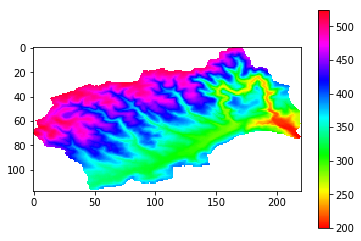

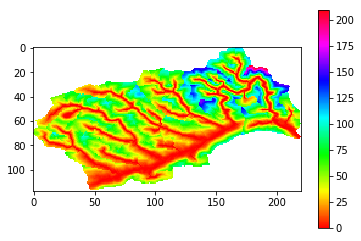

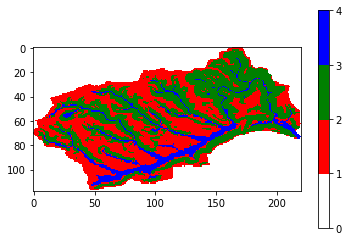

In [7]:
import numpy       as np
import matplotlib as mpl
import matplotlib.pyplot as plt

DEM=np.genfromtxt('wark_data/dem.asc',  dtype=float, autostrip=True)
slope=np.genfromtxt('wark_data/slope.asc',  dtype=float, autostrip=True)
hand=np.genfromtxt('wark_data/HAND.asc',  dtype=float, autostrip=True)
basin=np.genfromtxt('wark_data/basin.asc',  dtype=float, autostrip=True)

#plot DEM
plt.figure(1)
DEM[DEM==-9999]=np.nan
plt.imshow(DEM, cmap='hsv')
plt.colorbar()
 
#plot HAND
plt.figure(2)
hand[hand==-9999]=np.nan
plt.imshow(hand, cmap='hsv')
plt.colorbar()


#make landscape classification
hillslope = np.array(slope) >11
plateau = (np.array(hand) > 5) & (np.array(slope) <= 11)
wetland = (np.array(hand) <= 5) & (np.array(slope) <= 11)
basin = np.array(basin)>0

hillslope_per = float(np.sum(hillslope))/float(np.sum(basin))
wetland_per = float(np.sum(wetland))/float(np.sum(basin))
plateau_per = float(np.sum(plateau))/float(np.sum(basin))



landscapes=np.zeros((118,220))
landscapes[plateau]=1
landscapes[hillslope]=2
landscapes[wetland]=3

#plot landscapes
cmap = mpl.colors.ListedColormap(['white', 'red', 'green', 'blue'])
bounds=[0,1,2,3,4]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

plt.figure(3)
plt.imshow(landscapes, cmap=cmap, norm=norm)
plt.colorbar()
plt.show()







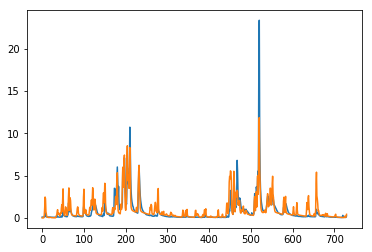

In [8]:
import numpy       as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from FLEXtopo import FLEXtopo


forcing=np.genfromtxt('wark_data/forcingWark.txt',  dtype=float, autostrip=True)

                  #      Imax Ce Sumax beta Pmax    Kf  
ParPlateau   = np.array([3.2, 0.50, 17.40, 0.95, 1.76, 0.91])   
                  #      Imax Ce Sumax beta D     Kf  
ParHillslope = np.array([3.25, 0.50, 321.99, 0.99, 0.4,0.97])
                  #      Imax Ce Sumax beta Cmax     Kf  
ParWetland   = np.array([9.94, 0.50, 53.25, 0.70, 0.65, 0.45])
              # Ks Tlag
ParCatchment = np.array([0.0281, 2.21])

#landscape percentages
landscape_per=np.array([0.4463, 0.4432, 0.1106])


Qm = FLEXtopo(ParPlateau, ParHillslope, ParWetland, ParCatchment, forcing[:,3:6], landscape_per)
Qo = forcing[:,3]

plt.plot(range(0,len(Qo)),Qo)
plt.plot(range(0,len(Qm)),Qm)
plt.show()


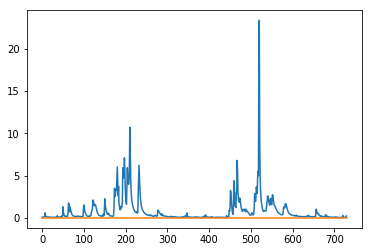

In [9]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from HBVMod import HBVMod


forcing=np.genfromtxt('wark_data/forcingWark.txt',  dtype=float, autostrip=True)

                  #      Imax Ce Sumax beta Pmax    Kf  
Par = np.array([6.15, 0.68, 89.15, 1.85, 0.09, 1.10, 0.1, 0.008])




Qm = HBVMod(Par, forcing[:,3:6])
Qo = forcing[:,3]


plt.plot(range(0,len(Qo)),Qo)
plt.plot(range(0,len(Qm)),Qm)
plt.show()
